In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    r2_score
)

### **Read Dataset & Convert in to DataFrama**

In [54]:
df = pd.read_csv("../dataset/student-mat.csv")

## **Data Cleaning & Pre-processing**

In [55]:
# Statistical Summary
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [56]:
# Summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [57]:
# Dataset Header
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [58]:
# Columns in the dataset
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [59]:
# Chek number of unique values in each columns
for col in df.columns:
    print(f"{col}: {df[col].nunique()}", end="\t")

school: 2	sex: 2	age: 8	address: 2	famsize: 2	Pstatus: 2	Medu: 5	Fedu: 5	Mjob: 5	Fjob: 5	reason: 4	guardian: 3	traveltime: 4	studytime: 4	failures: 4	schoolsup: 2	famsup: 2	paid: 2	activities: 2	nursery: 2	higher: 2	internet: 2	romantic: 2	famrel: 5	freetime: 5	goout: 5	Dalc: 5	Walc: 5	health: 5	absences: 34	G1: 17	G2: 17	G3: 18	

In [60]:
# Applying OneHotEncoding to all the category columns in the dataset
df = pd.get_dummies (
    df, 
    columns=[
        'school', 'sex', 'address', 
        'famsize', 'Pstatus', 'Mjob',
        'Fjob', 'reason', 'guardian',
        'guardian','schoolsup', 'famsup',
        'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic'
    ], 
    drop_first=True
)

print(df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

## **Exploratory Data Analysis**

<Axes: xlabel='G3', ylabel='Count'>

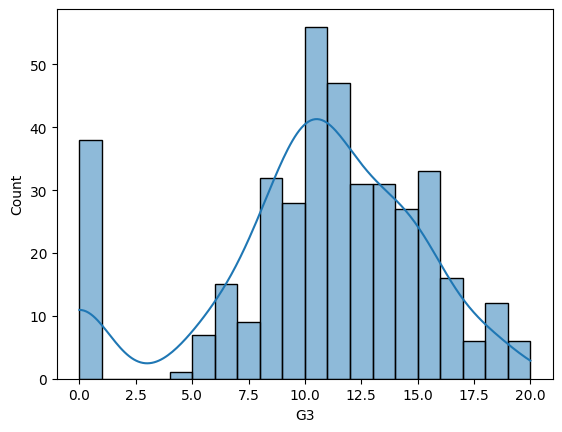

In [61]:
sns.histplot(df['G3'], kde=True, bins=20)


In [62]:
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")


<Axes: xlabel='G1', ylabel='G3'>

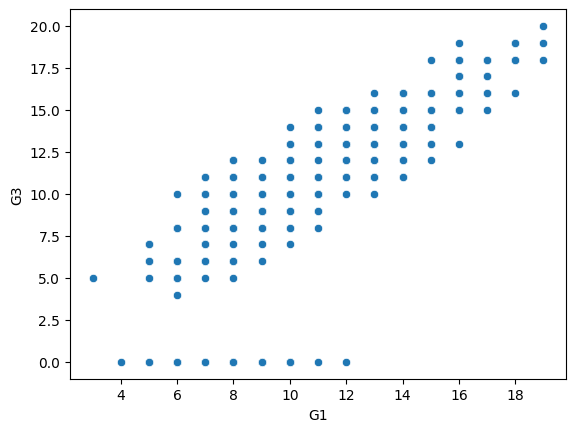

In [63]:
sns.scatterplot(x='G1', y='G3', data=df)

<Axes: xlabel='G2', ylabel='G3'>

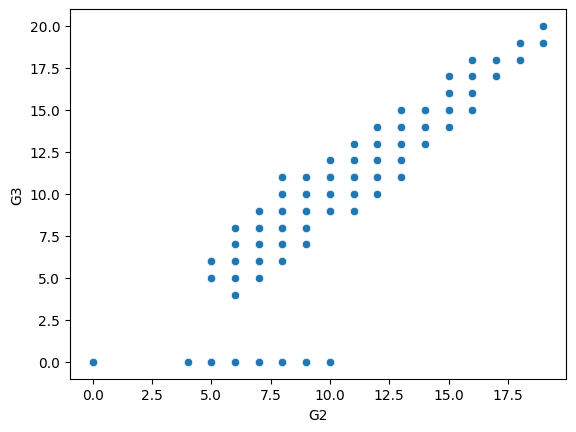

In [64]:

sns.scatterplot(x='G2', y='G3', data=df)

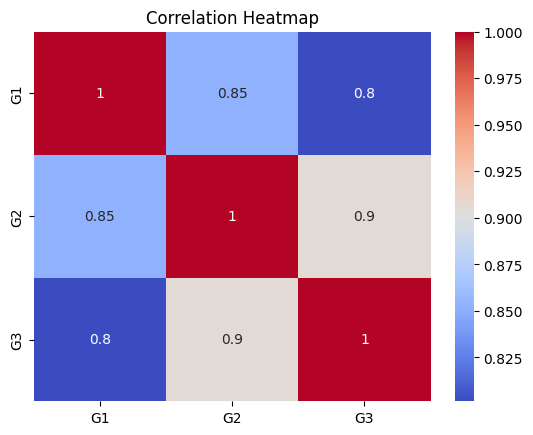

In [65]:
corr = df[['G1', 'G2', 'G3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
cols = df.columns
cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'guardian_mother', 'guardian_other', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'],
      dtype='object')

<Axes: xlabel='school_MS', ylabel='G3'>

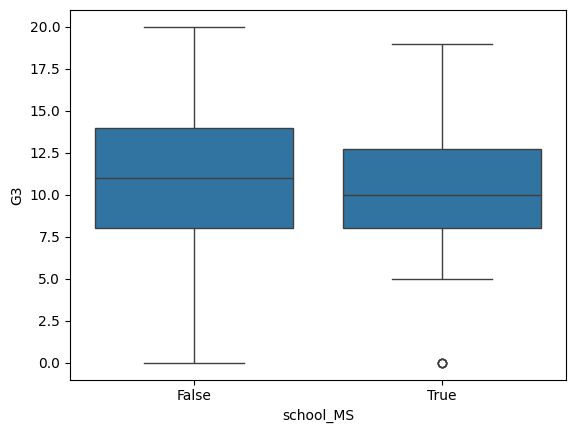

In [67]:
sns.boxplot(x='school_MS', y='G3', data=df)

<Axes: xlabel='reason_other', ylabel='G3'>

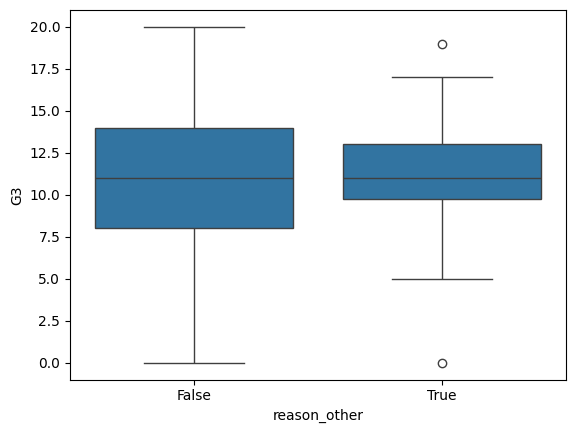

In [68]:
sns.boxplot(x='reason_other', y='G3', data=df)

### **Standardizing Dataset**

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'absences', 'G1', 'G2']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head(2))

        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  1.023046     4     4           2          2         0       4         3   
1  0.238380     1     1           1          2         0       5         3   

   goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
0      4     1  ...             True           False           True   
1      3     1  ...            False           False          False   

   famsup_yes  paid_yes  activities_yes  nursery_yes  higher_yes  \
0       False     False           False         True        True   
1        True     False           False        False        True   

   internet_yes  romantic_yes  
0         False         False  
1          True         False  

[2 rows x 44 columns]


## **Feature Selection Reasoning:**

Every variable in the dataset potentially affects student performance.
Here’s why each type of feature is valuable:

### 1. **Demographic & Background**

1. school → captures institutional differences (quality, resources, grading policy, teaching staff).

2. sex, age → may reflect maturity, social expectations, or learning style differences.

3. address, famsize, Pstatus → socioeconomic context can influence study habits and stress.

### 2. **Parental Influence**

1. Medu, Fedu, Mjob, Fjob → strong correlation with academic performance (education level & job type affect academic support at home).

2. guardian → emotional and academic supervision vary with guardian type.

### 3. **Study Habits & Academic Factors**

1. traveltime, studytime, failures, schoolsup, famsup, paid → all directly relate to learning time and resources.

2. reason → shows motivation and access (e.g., school near home vs. famous for academics).

### 4. **Personal & Social Behavior**

1. activities, nursery, higher, internet, romantic → indicate lifestyle and ambition level.

2. famrel, freetime, goout, Dalc, Walc, health, absences → balance between social life, health, and discipline.

### 5. **Performance History**

1. G1, G2 → most predictive features (early grades strongly correlate with the final grade).

In [70]:
features = df.drop('G3', axis=1)
target = df['G3']

### **Splitting Dataset into Train and Test Set 70/30 Ratio**

In [71]:
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.3, random_state=42)

## **Linear Regression Model Training**

In [72]:
reg_model = LinearRegression()
reg_model.fit(xTrain, yTrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## **Model Evaluation**

In [73]:
yPred = reg_model.predict(xTest)

In [74]:
mse = mean_squared_error(yTest, yPred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.99300865992437


In [75]:
r2Score = r2_score(yTest, yPred)
print(f"R2 Score: {r2Score}")

R2 Score: 0.7728598737079843


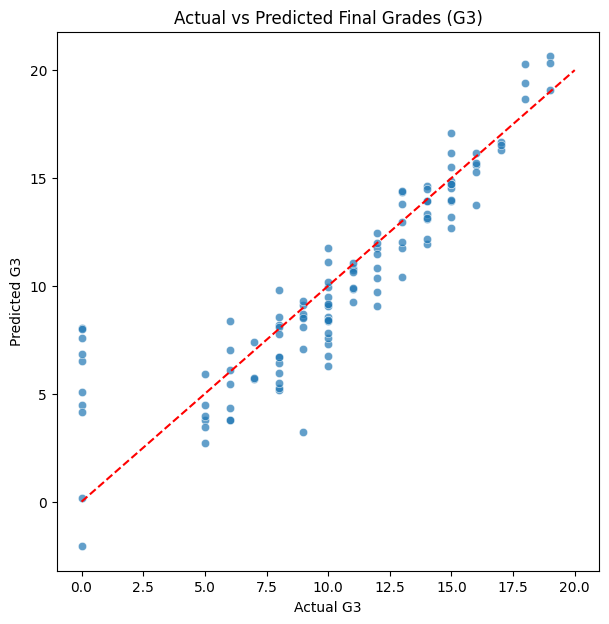

In [76]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=yTest, y=yPred, alpha=0.7)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades (G3)")
plt.show()

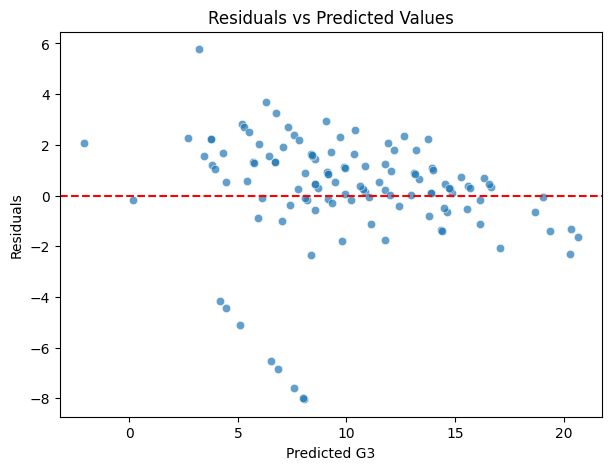

In [77]:
residuals = yTest - yPred

plt.figure(figsize=(7,5))
sns.scatterplot(x=yPred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted G3")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [78]:
print("Train R²:", reg_model.score(xTrain, yTrain))
print("Test R²:", reg_model.score(xTest, yTest))


Train R²: 0.8678351970261922
Test R²: 0.7728598737079843
